Blog site: https://medium.com/@siyao_sui/emnist-classification-with-convolutional-neural-network-5f0da8eed3c4

In [1]:
from mnist_reader import load_mnist
from keras.layers import Dense, MaxPooling2D, Conv2D, Dropout
from keras.layers import Flatten, InputLayer, Lambda
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras import optimizers
from keras.utils import np_utils
from keras.initializers import Constant
import keras
from keras import models, layers
import numpy as np
import pandas as pd

Using TensorFlow backend.
/Users/ssui9307/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train = pd.read_csv('data/emnist-balanced-train.csv')
test = pd.read_csv('data/emnist-balanced-test.csv')

In [3]:
X_train = train.iloc[:,1:].astype('float32') / 255
X_test = test.iloc[:,1:].astype('float32') / 255

y_train = train.iloc[:,0]
y_train = keras.utils.np_utils.to_categorical(y_train, 47)

y_test = test.iloc[:,0]
y_test = keras.utils.np_utils.to_categorical(y_test, 47)

In [4]:
X_train = np.asarray(X_train).reshape(-1, 28, 28, 1).astype('float32')
X_test = np.asarray(X_test).reshape(-1, 28, 28, 1).astype('float32')

In [23]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('t_test shape: ',y_test.shape)

X_train shape:  (112799, 28, 28, 1)
X_test shape:  (18799, 28, 28, 1)
y_train shape:  (112799, 47)
t_test shape:  (18799, 47)


In [27]:
model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.5))

model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))


model_2.add(layers.Flatten())
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(47, activation='softmax'))

In [28]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
__________

In [29]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
result_2 = model_2.fit(X_train, y_train, 
            epochs=10, 
            batch_size=256, 
            verbose = 1, validation_data = (X_test, y_test))

Train on 112799 samples, validate on 18799 samples
Epoch 1/10
112799/112799 [==============================] - 102s 905us/step - loss: 1.2563 - acc: 0.6282 - val_loss: 0.5524 - val_acc: 0.8232
Epoch 2/10
112799/112799 [==============================] - 116s 1ms/step - loss: 0.6390 - acc: 0.7900 - val_loss: 0.4570 - val_acc: 0.8447
Epoch 3/10
112799/112799 [==============================] - 126s 1ms/step - loss: 0.5468 - acc: 0.8159 - val_loss: 0.4132 - val_acc: 0.8590
Epoch 4/10
112799/112799 [==============================] - 119s 1ms/step - loss: 0.4984 - acc: 0.8306 - val_loss: 0.3867 - val_acc: 0.8663
Epoch 5/10
112799/112799 [==============================] - 119s 1ms/step - loss: 0.4675 - acc: 0.8381 - val_loss: 0.3780 - val_acc: 0.8690
Epoch 6/10
112799/112799 [==============================] - 121s 1ms/step - loss: 0.4445 - acc: 0.8456 - val_loss: 0.3637 - val_acc: 0.8717
Epoch 7/10
112799/112799 [==============================] - 120s 1ms/step - loss: 0.4252 - acc: 0.8509 - va

In [30]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.340675614707
Test accuracy: 0.877812649615


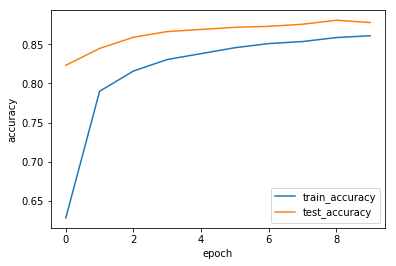

In [31]:
import matplotlib.pyplot as plt
def show_history(result_2):
    plt.plot(result_2.history['acc'])
    plt.plot(result_2.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(result_2)

In [5]:
def normalize(data):
    return (data - X_train.mean().astype(np.float32)) / (X_train.std().astype(np.float32))

In [6]:
model_4 = Sequential([
    Lambda(normalize, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),


    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(47, activation='softmax')
])

In [7]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
__________

In [8]:
model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
result_4 = model_4.fit(X_train, y_train, 
            epochs=10, 
            batch_size=64, 
            verbose = 1, validation_data = (X_test, y_test))

Train on 112799 samples, validate on 18799 samples
Epoch 1/10
 90496/112799 [=======================>......] - ETA: 3:26 - loss: 1.0034 - acc: 0.7029

KeyboardInterrupt: 

In [ ]:
score_4 = model_4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_4[0])
print('Test accuracy:', score_4[1])

In [ ]:
def show_history(result_4):
    plt.plot(result_4.history['acc'])
    plt.plot(result_4.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(result_4)